In [1]:
import requests
import time
import collections
import matplotlib
import pandas as pd
from pprint import pprint

In [2]:
url = 'https://api.vk.com/method/users.get?'
params = {
   # 'user_ids': id_,
    'v': 5.73,
    #'lang': 'ru',
    #'fields': 'sex, bdate, city',
    'access_token': '0bacdcbf0bacdcbf0bacdcbfca0bd98be200bac0bacdcbf54602e6c585bfb326e7d4966',
}

city_data = requests.get(url, params)

In [3]:
url = 'https://api.vk.com/method/groups.getMembers'

In [4]:
params = {
    'group_id': 'nplusone',
    'v': 5.73,
    'lang': 'ru',
    'fields': 'sex, bdate, city',
    'access_token': '0bacdcbf0bacdcbf0bacdcbfca0bd98be200bac0bacdcbf54602e6c585bfb326e7d4966',
}

In [5]:
req = requests.get(url, params)

In [6]:
data = req.json()

In [7]:
data

{'response': {'count': 211141,
  'items': [{'first_name': 'Николай',
    'id': 6,
    'last_name': 'Дуров',
    'sex': 2,
    'city': {'id': 2, 'title': 'Санкт-Петербург'}},
   {'first_name': 'Елисей',
    'id': 154,
    'last_name': 'Замахов',
    'sex': 2,
    'bdate': '10.8',
    'city': {'id': 6823, 'title': 'Łódź'}},
   {'first_name': 'Екатерина',
    'id': 243,
    'last_name': 'Скобейко',
    'sex': 1,
    'bdate': '26.3.1987',
    'city': {'id': 2, 'title': 'Санкт-Петербург'}},
   {'first_name': 'Мария',
    'id': 274,
    'last_name': 'Тюрина',
    'sex': 1,
    'bdate': '16.11.1985',
    'city': {'id': 2202278, 'title': 'Kraków'}},
   {'first_name': 'Галина',
    'id': 348,
    'last_name': 'Румянцева',
    'deactivated': 'banned',
    'sex': 1},
   {'first_name': 'Алексей',
    'id': 407,
    'last_name': 'Железнов',
    'sex': 2,
    'bdate': '3.8'},
   {'first_name': 'Павел',
    'id': 516,
    'last_name': 'Ковалёв',
    'sex': 2,
    'bdate': '10.1.1986',
    'city': {'i

In [8]:
ids = []
city = set()
for record in data['response']['items']:
    ids.append(record['id'])
    id_ = record['id']
    try:
#         if record['city']['title'] != '':
        city.add(record['city']['title'])
    except KeyError as ke:
#         print(f'Город у пользователя {record["id"]} не указан', ke)
        continue
# print(ids)
print(city)

{'', 'Copenhagen', 'Иркутск', 'Kraków', 'Toulouse', 'Pattaya', 'Марковская', 'Vilnius', 'Islamabad', 'Ставрополь', 'Saarbrücken', 'Орск', 'Умань', 'Helsinki', 'Борок', 'Phuket', 'Челмужи', 'Череповец', 'Белгород', 'Сочи', 'Уфа', 'Wrocław', 'Basel', 'Uppsala', 'Бугуртак', 'Великий Новгород', 'Казань', 'Тбилиси', 'Кишинев', 'Белоярский', 'Озерск', 'Друг Крестьянина', 'Наро-Фоминск', 'Выборг', 'Amsterdam', 'Санкт-Петербург', 'München', 'Омск', 'Киев', 'Гатчина', 'Красноярск', 'Стерлитамак', 'Краснодар', 'Пушкин', 'Дубна', 'Limassol', 'Bratislava', 'Лидино', 'Mindelo', 'London', 'Madrid', 'Железнодорожный (Балашиха)', 'Новосибирск', 'Las Palmas de Gran Canaria', 'Ростов-на-Дону', 'Aizuwakamatsu', 'Луга', 'Самара', 'Королёв', 'Москва', 'Łódź', 'Gilching', 'Новочеркасск', 'Жуковский', 'Архангельск', 'Нижний Новгород', 'Петропавловск', 'Lappeenranta', 'Минск', 'Димитровград', 'Троицк', 'Amstelveen', 'Seattle', 'Зеленоград', 'Veldhoven', 'Таганрог', 'Альметьевск', 'Шаталово', 'Baden', 'Дружков

In [9]:
cities_dict = {
    '': 0,
    'München': 0, 
    'Белгород': 0, 
    'Сочи': 0, 
    'Наро-Фоминск': 0, 
    'Кишинев': 0, 
    'Самара': 0, 
    'Жуковский': 0, 
    'Vilnius': 0, 
    'Железнодорожный (Балашиха)': 0, 
    'Ставрополь': 0, 'Казань': 0, 
    'Madrid': 0, 'Mindelo': 0, 
    'Друг Крестьянина': 0, 
    'Wrocław': 0, 
    'Łódź': 0, 
    'Pattaya': 0, 
    'Amstelveen': 0, 
    'Архангельск': 0, 
    'Gilching': 0, 
    'Уфа': 0, 
    'Пушкин': 0, 
    'Нижний Новгород': 0, 
    'Copenhagen': 0, 
    'Limassol': 0, 
    'Seattle': 0, 
    'Выборг': 0, 
    'Борок': 0, 
    'Великий Новгород': 0, 
    'Lappeenranta': 0, 
    'Bratislava': 0, 
    'Aizuwakamatsu': 0, 
    'Москва': 0, 
    'Тбилиси': 0, 
    'Челмужи': 0, 
    'Amsterdam': 0, 
    'Санкт-Петербург': 0, 
    'Baden': 0, 
    'Марковская': 0, 
    'Лидино': 0, 
    'Красноярск': 0, 
    'Луга': 0, 
    'Киев': 0, 
    'Дружковка': 0, 
    'Череповец': 0, 
    'Phuket': 0, 
    'Uppsala': 0, 
    'Краснодар': 0, 
    'Toulouse': 0, 
    'Гатчина': 0, 
    'Islamabad': 0, 
    'Шаталово': 0, 
    'Петропавловск': 0, 
    'Veldhoven': 0, 
    'Дубна': 0, 
    'Димитровград': 0, 
    'Новосибирск': 0, 
    'Омск': 0, 
    'Новочеркасск': 0, 
    'Зеленоград': 0, 
    'Минск': 0, 
    'Альметьевск': 0, 
    'Стерлитамак': 0, 
    'Озерск': 0, 
    'London': 0, 
    'Helsinki': 0, 
    'Иркутск': 0, 
    'Saarbrücken': 0, 
    'Las Palmas de Gran Canaria': 0, 
    'Орск': 0, 
    'Белоярский': 0, 
    'Ростов-на-Дону': 0, 
    'Королёв': 0, 
    'Умань': 0, 
    'Kraków': 0, 
    'Троицк': 0, 
    'Бугуртак': 0, 
    'Таганрог': 0, 
    'Basel': 0,
    'None': 0,
}

In [10]:
for record in data['response']['items']:
    id_ = record['id']
    try:
        town = record['city']['title']
#         if town != '':
        cities_dict[town] += 1 
    except KeyError as ke:
        cities_dict['None'] += 1
#         print(f'Город у пользователя {record["id"]} не указан', ke)
        continue

In [11]:
pprint(cities_dict)

{'': 2,
 'Aizuwakamatsu': 1,
 'Amstelveen': 1,
 'Amsterdam': 1,
 'Baden': 1,
 'Basel': 1,
 'Bratislava': 1,
 'Copenhagen': 1,
 'Gilching': 1,
 'Helsinki': 2,
 'Islamabad': 1,
 'Kraków': 1,
 'Lappeenranta': 1,
 'Las Palmas de Gran Canaria': 1,
 'Limassol': 1,
 'London': 2,
 'Madrid': 1,
 'Mindelo': 1,
 'München': 2,
 'None': 214,
 'Pattaya': 1,
 'Phuket': 1,
 'Saarbrücken': 1,
 'Seattle': 1,
 'Toulouse': 1,
 'Uppsala': 1,
 'Veldhoven': 1,
 'Vilnius': 1,
 'Wrocław': 1,
 'Łódź': 1,
 'Альметьевск': 1,
 'Архангельск': 1,
 'Белгород': 1,
 'Белоярский': 1,
 'Борок': 1,
 'Бугуртак': 1,
 'Великий Новгород': 2,
 'Выборг': 1,
 'Гатчина': 2,
 'Димитровград': 1,
 'Друг Крестьянина': 1,
 'Дружковка': 1,
 'Дубна': 2,
 'Железнодорожный (Балашиха)': 1,
 'Жуковский': 1,
 'Зеленоград': 1,
 'Иркутск': 1,
 'Казань': 1,
 'Киев': 1,
 'Кишинев': 1,
 'Королёв': 1,
 'Краснодар': 1,
 'Красноярск': 1,
 'Лидино': 1,
 'Луга': 1,
 'Марковская': 1,
 'Минск': 1,
 'Москва': 194,
 'Наро-Фоминск': 1,
 'Нижний Новгород': 

## Визуализация отчета по городам с помощью Pandas

In [12]:
df = pd.DataFrame.from_dict(cities_dict, orient = 'index').reset_index()

In [13]:
df

,index,0
0,,2
1,München,2
2,Белгород,1
3,Сочи,2
4,Наро-Фоминск,1
...,...,...
76,Троицк,1
77,Бугуртак,1
78,Таганрог,1
79,Basel,1


In [14]:
df.rename(columns={'index': 'Город', 0: 'Пользователей'}, inplace=True)
df = df.sort_values('Пользователей', ascending=False)

In [15]:
df

,Город,Пользователей
37,Санкт-Петербург,488
80,None,214
33,Москва,194
57,Новосибирск,11
23,Нижний Новгород,5
...,...,...
42,Луга,1
43,Киев,1
44,Дружковка,1
45,Череповец,1


In [16]:
df['category'] = df.apply(lambda x: x['Город'] if x['Пользователей'] > 100 else 'Другие', axis=1)

In [17]:
df

,Город,Пользователей,category
37,Санкт-Петербург,488,Санкт-Петербург
80,None,214,None
33,Москва,194,Москва
57,Новосибирск,11,Другие
23,Нижний Новгород,5,Другие
...,...,...,...
42,Луга,1,Другие
43,Киев,1,Другие
44,Дружковка,1,Другие
45,Череповец,1,Другие


In [18]:
df = df.groupby('category').sum().head()

In [19]:
df 

,Пользователей
category,
None,214
Другие,104
Москва,194
Санкт-Петербург,488


<AxesSubplot:ylabel='Пользователей'>

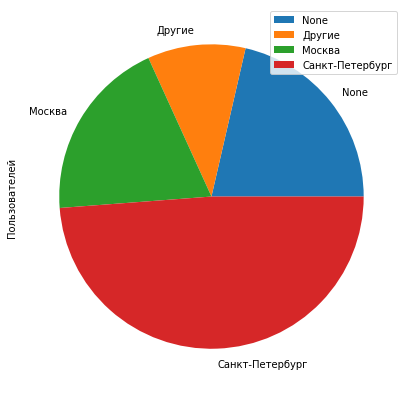

In [20]:
%matplotlib inline
df.head().plot(kind = 'pie', y = 'Пользователей', figsize= (7, 7))